In [4]:
import numpy as np
from scipy.optimize import fsolve, differential_evolution

import pandas as pd
import matplotlib.pyplot as plt
from galileo import GalileoCalculator

In [5]:
def triangular_params_from_percentiles(p10, p50, p90):
    def equations(vars):
        d1, d2 = vars
        eq1 = (d1 - (p50 - p10))**2 - 0.1 * d1 * (d1 + d2)
        eq2 = (d2 - (p90 - p50))**2 - 0.1 * d2 * (d1 + d2)
        return [eq1, eq2]
    initial_guess = [p50 - p10, p90 - p50]
    d1, d2 = fsolve(equations, initial_guess)
    a = p50 - d1
    b = p50 + d2
    return a, p50, b

In [6]:
a_c, m_c, b_c = triangular_params_from_percentiles(400, 500, 800)
s1 = (21, 35, 49);s2 = (21, 28, 35);s3 = (28, 42, 56)
alc, mlc, blc = triangular_params_from_percentiles(18, 22.5, 25.5)

In [7]:
def simulate_profit(ks_order_quantity, num_trials):
    profits = []
    for trial in range(num_trials):
        calc = GalileoCalculator()
        calc.ks_order_quantity = ks_order_quantity
        rand_num = np.random.rand()
        if rand_num < 0.6:
            p10_resume, p50_resume, p90_resume = s1
            calc.t_capacity = 1000
        elif rand_num < 0.8:
            p10_resume, p50_resume, p90_resume = s2
            calc.t_capacity = 1000
        else:
            p10_resume, p50_resume, p90_resume = s3
            calc.t_capacity = np.random.triangular(a_c, m_c, b_c)

        a_resume, m_resume, b_resume = triangular_params_from_percentiles(p10_resume, p50_resume, p90_resume)
        calc.t_resume = np.random.triangular(a_resume, m_resume, b_resume)
        calc.labor_cost_binocular = np.random.triangular(alc, mlc, blc)
        if np.random.rand() < 0.2:
            calc.salvage_value_eyepiece = 5
        else:
            calc.salvage_value_eyepiece = np.random.uniform(2, 4)
        calc.rmb_usd = np.random.normal(7, 0.1)
        profit = calc.calculate_profit()
        profits.append(profit)
    mean_profit = np.mean(profits)
    std_error = np.std(profits) / np.sqrt(num_trials)
    print(f"Mean Profit: ${mean_profit:.2f}")
    print(f"Std_Error of Profit: ${std_error:.2f}")
    return mean_profit , std_error

In [8]:
def simulate_profit1(ks_order_quantity, num_trials):
    profits = []
    for trial in range(num_trials):
        calc = GalileoCalculator()
        calc.ks_order_quantity = ks_order_quantity
        rand_num = np.random.rand()
        if rand_num < 0.6:
            p10_resume, p50_resume, p90_resume = s1
            calc.t_capacity = 1000
        elif rand_num < 0.8:
            p10_resume, p50_resume, p90_resume = s2
            calc.t_capacity = 1000
        else:
            p10_resume, p50_resume, p90_resume = s3
            calc.t_capacity = np.random.triangular(a_c, m_c, b_c)

        a_resume, m_resume, b_resume = triangular_params_from_percentiles(p10_resume, p50_resume, p90_resume)
        calc.t_resume = np.random.triangular(a_resume, m_resume, b_resume)
        calc.labor_cost_binocular = np.random.triangular(alc, mlc, blc)
        if np.random.rand() < 0.2:
            calc.salvage_value_eyepiece = 5
        else:
            calc.salvage_value_eyepiece = np.random.uniform(2, 4)
        calc.rmb_usd = np.random.normal(7, 0.1)
        profit = calc.calculate_profit()
        profits.append(profit)
    mean_profit = np.mean(profits)
    std_error = np.std(profits) / np.sqrt(num_trials)
    return mean_profit , std_error

In [9]:
def simulate_profits(ks_order_quantity, num_trials):
    profits = []
    for trial in range(num_trials):
        calc = GalileoCalculator()
        calc.ks_order_quantity = ks_order_quantity
        rand_num = np.random.rand()
        if rand_num < 0.6:
            p10_resume, p50_resume, p90_resume = s1
            calc.t_capacity = 1000
        elif rand_num < 0.8:
            p10_resume, p50_resume, p90_resume = s2
            calc.t_capacity = 1000
        else:
            p10_resume, p50_resume, p90_resume = s3
            calc.t_capacity = np.random.triangular(a_c, m_c, b_c)

        a_resume, m_resume, b_resume = triangular_params_from_percentiles(p10_resume, p50_resume, p90_resume)
        calc.t_resume = np.random.triangular(a_resume, m_resume, b_resume)
        calc.labor_cost_binocular = np.random.triangular(alc, mlc, blc)
        if np.random.rand() < 0.2:
            calc.salvage_value_eyepiece = 5
        else:
            calc.salvage_value_eyepiece = np.random.uniform(2, 4)
        calc.rmb_usd = np.random.normal(7, 0.1)
        profit = calc.calculate_profit()
        profits.append(profit)
    return np.array(profits)

In [10]:
np.random.seed(100)
def objective(ks_qty):
    mean_profit,_ = simulate_profit1(ks_qty[0], num_trials=10000)
    return -mean_profit
bounds = [(0, 32000)]
result = differential_evolution(objective, bounds, strategy='best1bin', popsize=15, maxiter=100, tol=0.01)
optimal_qty = result.x[0]
optimal_mean_profit = -result.fun
print("Optimal Kunshan Order Quantity (ks_order_quantity):", optimal_qty)
print(f"Optimal Mean Profit: ${optimal_mean_profit:.2f}")

Optimal Kunshan Order Quantity (ks_order_quantity): 15545.289716942803
Optimal Mean Profit: $412045.60


In [11]:
np.random.seed(100)
loop = 4
def optimize():
    result = differential_evolution(objective, bounds, strategy='best1bin',
                                  popsize=15, maxiter=5, tol=0.01)
    return result.x[0]
optimal_quantities = np.array([optimize() for _ in range(loop)])
std_deviation = np.std(optimal_quantities, ddof=1)
std_error = std_deviation / np.sqrt(loop)
print("Expected Optimal Quantity to order from Kunshan:", np.mean(optimal_quantities))
print("Standard error of the optimal quantity:", std_error)

Expected Optimal Quantity to order from Kunshan: 15967.587261636907
Standard error of the optimal quantity: 200.46565556086858


In [12]:
optimal_quantities

array([15545.28971694, 16470.10462291, 16082.65664415, 15772.29806254])

In [13]:
profits_0 = simulate_profit(ks_order_quantity=0, num_trials=10000)
profits_15500 = simulate_profit(ks_order_quantity=15500, num_trials=10000)
profits_16000 = simulate_profit(ks_order_quantity=16000, num_trials=10000)
profits_16500 = simulate_profit(ks_order_quantity=16500, num_trials=10000)
profits_17000 = simulate_profit(ks_order_quantity=17000, num_trials=10000)
profits_17500 = simulate_profit(ks_order_quantity=17500, num_trials=10000)
profits_18000 = simulate_profit(ks_order_quantity=18000, num_trials=10000)
profits_18500 = simulate_profit(ks_order_quantity=18500, num_trials=10000)

Mean Profit: $255210.11
Std_Error of Profit: $2272.55
Mean Profit: $411561.19
Std_Error of Profit: $866.95
Mean Profit: $409983.88
Std_Error of Profit: $825.24
Mean Profit: $412340.12
Std_Error of Profit: $770.69
Mean Profit: $410831.96
Std_Error of Profit: $720.64
Mean Profit: $410437.35
Std_Error of Profit: $685.00
Mean Profit: $409469.11
Std_Error of Profit: $658.15
Mean Profit: $410628.96
Std_Error of Profit: $607.27


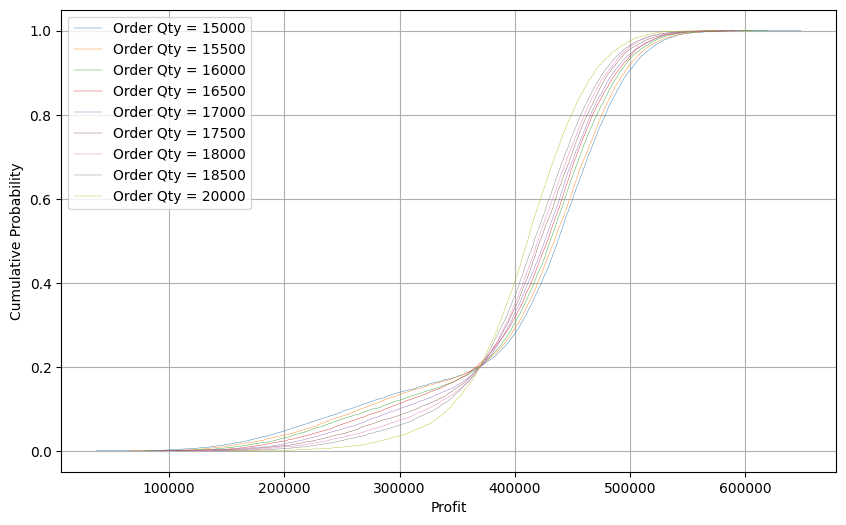

In [14]:
np.random.seed(100)

def compute_ecdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

profits_15000 = simulate_profits(ks_order_quantity=15000, num_trials=10000)
profits_15500 = simulate_profits(ks_order_quantity=15500, num_trials=10000)
profits_16000 = simulate_profits(ks_order_quantity=16000, num_trials=10000)
profits_16500 = simulate_profits(ks_order_quantity=16500, num_trials=10000)
profits_17000 = simulate_profits(ks_order_quantity=17000, num_trials=10000)
profits_17500 = simulate_profits(ks_order_quantity=17500, num_trials=10000)
profits_18000 = simulate_profits(ks_order_quantity=18000, num_trials=10000)
profits_18500 = simulate_profits(ks_order_quantity=18500, num_trials=10000)
profits_20000 = simulate_profits(ks_order_quantity=20000, num_trials=10000)

sorted_15000, cdf_15000 = compute_ecdf(profits_15000)
sorted_15500, cdf_15500 = compute_ecdf(profits_15500)
sorted_16000, cdf_16000 = compute_ecdf(profits_16000)
sorted_16500, cdf_16500 = compute_ecdf(profits_16500)
sorted_17000, cdf_17000 = compute_ecdf(profits_17000)
sorted_17500, cdf_17500 = compute_ecdf(profits_17500)
sorted_18000, cdf_18000 = compute_ecdf(profits_18000)
sorted_18500, cdf_18500 = compute_ecdf(profits_18500)
sorted_20000, cdf_20000 = compute_ecdf(profits_20000)

plt.figure(figsize=(10, 6))
plt.plot(sorted_15000, cdf_15000, label='Order Qty = 15000', linestyle='-', linewidth=0.3)
plt.plot(sorted_15500, cdf_15500, label='Order Qty = 15500', linestyle='-', linewidth=0.3)
plt.plot(sorted_16000, cdf_16000, label='Order Qty = 16000', linestyle='-', linewidth=0.3)
plt.plot(sorted_16500, cdf_16500, label='Order Qty = 16500', linestyle='-', linewidth=0.3)
plt.plot(sorted_17000, cdf_17000, label='Order Qty = 17000', linestyle='-', linewidth=0.3)
plt.plot(sorted_17500, cdf_17500, label='Order Qty = 17500', linestyle='-', linewidth=0.3)
plt.plot(sorted_18000, cdf_18000, label='Order Qty = 18000', linestyle='-', linewidth=0.3)
plt.plot(sorted_18500, cdf_18500, label='Order Qty = 18500', linestyle='-', linewidth=0.3)
plt.plot(sorted_20000, cdf_20000, label='Order Qty = 20000', linestyle='-', linewidth=0.3)


plt.xlabel('Profit')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()
plt.show()

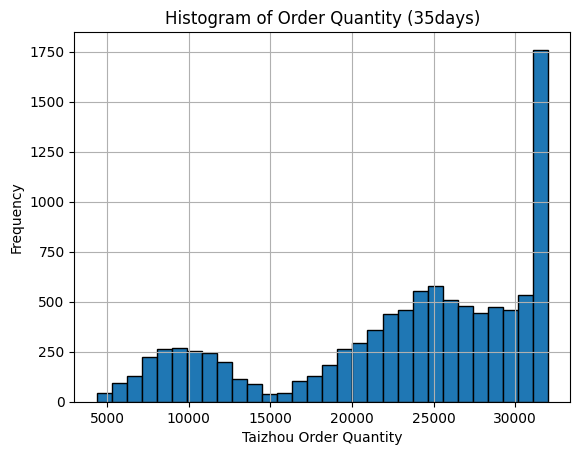

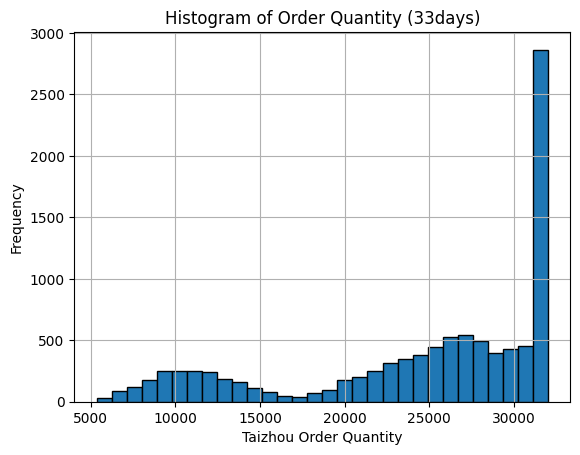

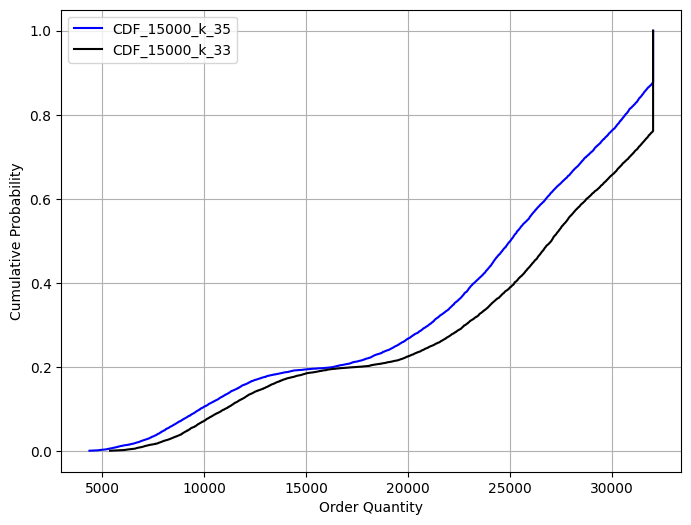

In [16]:
np.random.seed(100)

def simulate_t_qntty(ks_order_quantity, num_trials, t_assemble):
    qntty = []
    for trial in range(num_trials):
        calc = GalileoCalculator()
        calc.ks_order_quantity = ks_order_quantity
        rand_num = np.random.rand()
        if rand_num < 0.6:
            p10_resume, p50_resume, p90_resume = s1
            calc.t_capacity = 1000
        elif rand_num < 0.8:
            p10_resume, p50_resume, p90_resume = s2
            calc.t_capacity = 1000
        else:
            p10_resume, p50_resume, p90_resume = s3
            calc.t_capacity = np.random.triangular(a_c, m_c, b_c)

        a_resume, m_resume, b_resume = triangular_params_from_percentiles(p10_resume, p50_resume, p90_resume)
        calc.t_resume = np.random.triangular(a_resume, m_resume, b_resume)

        first_step = max(0, 95 - calc.t_resume - t_assemble)
        second_step = first_step * calc.t_capacity
        tz_order_quantity = min(16000 * 2, second_step)
        qntty.append(tz_order_quantity)
    return np.array(qntty)

tzh_1 = simulate_t_qntty(ks_order_quantity=15000, num_trials=10000, t_assemble = 35)
plt.hist(tzh_1, bins=30, edgecolor='black')
plt.title('Histogram of Order Quantity (35days)')
plt.xlabel('Taizhou Order Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


tzh_2 = simulate_t_qntty(ks_order_quantity=15000, num_trials=10000, t_assemble = 33)
plt.hist(tzh_2, bins=30, edgecolor='black')
plt.title('Histogram of Order Quantity (33days)')
plt.xlabel('Taizhou Order Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


sorted_data = np.sort(tzh_1)
sorted_data1 = np.sort(tzh_2)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
cdf1 = np.arange(1, len(sorted_data1) + 1) / len(sorted_data1)
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, cdf, label='CDF_15000_k_35', color='blue')
plt.plot(sorted_data1, cdf1, label='CDF_15000_k_33', color='black')
plt.plot()
plt.xlabel('Order Quantity')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()
plt.show()


In [17]:
#ValueOfInformation
def simulate_profit2(ks_order_quantity, num_trials, time_to_assemble):
    profits = []
    for trial in range(num_trials):
        calc = GalileoCalculator()
        time_to_assemble = 33
        calc.ks_order_quantity = ks_order_quantity
        rand_num = np.random.rand()
        if rand_num < 0.6:
            p10_resume, p50_resume, p90_resume = s1
            calc.t_capacity = 1000
        elif rand_num < 0.8:
            p10_resume, p50_resume, p90_resume = s2
            calc.t_capacity = 1000
        else:
            p10_resume, p50_resume, p90_resume = s3
            calc.t_capacity = np.random.triangular(a_c, m_c, b_c)

        a_resume, m_resume, b_resume = triangular_params_from_percentiles(p10_resume, p50_resume, p90_resume)
        calc.t_resume = np.random.triangular(a_resume, m_resume, b_resume)
        calc.labor_cost_binocular = np.random.triangular(alc, mlc, blc)
        if np.random.rand() < 0.2:
            calc.salvage_value_eyepiece = 5
        else:
            calc.salvage_value_eyepiece = np.random.uniform(2, 4)
        calc.rmb_usd = np.random.normal(7, 0.1)
        profit = calc.calculate_profit()
        profits.append(profit)
    mean_profit = np.mean(profits)
    std_error = np.std(profits) / np.sqrt(num_trials)
    print(f"Mean Profit: ${mean_profit:.2f}")
    print(f"Std_Error of Profit: ${std_error:.2f}")
    return mean_profit , std_error


In [24]:
np.random.seed(100)
simulate_profit2(ks_order_quantity=15000, num_trials= 10000, time_to_assemble = 35 )
simulate_profit2(ks_order_quantity=15000, num_trials= 10000, time_to_assemble = 33 )

Mean Profit: $412520.66
Std_Error of Profit: $913.39
Mean Profit: $411875.55
Std_Error of Profit: $919.57


(411875.5463977748, 919.5674385846937)

In [19]:
#The maximum value you should spend for the information of how long it will take to assemble if you are going ahead with 15,000
412520.66+913.39 - (411875.55 - 919.57)

2478.070000000007

In [20]:
#Considering for down side irrespective of the probability distribution
np.random.seed(100)
profits_20000 = simulate_profit(ks_order_quantity=20000, num_trials=10000)
profits_22000 = simulate_profit(ks_order_quantity=22000, num_trials=10000)
profits_24000 = simulate_profit(ks_order_quantity=24000, num_trials=10000)
profits_26000 = simulate_profit(ks_order_quantity=26000, num_trials=10000)


Mean Profit: $408228.05
Std_Error of Profit: $520.02
Mean Profit: $403666.83
Std_Error of Profit: $454.81
Mean Profit: $393586.97
Std_Error of Profit: $441.74
Mean Profit: $382596.10
Std_Error of Profit: $446.63


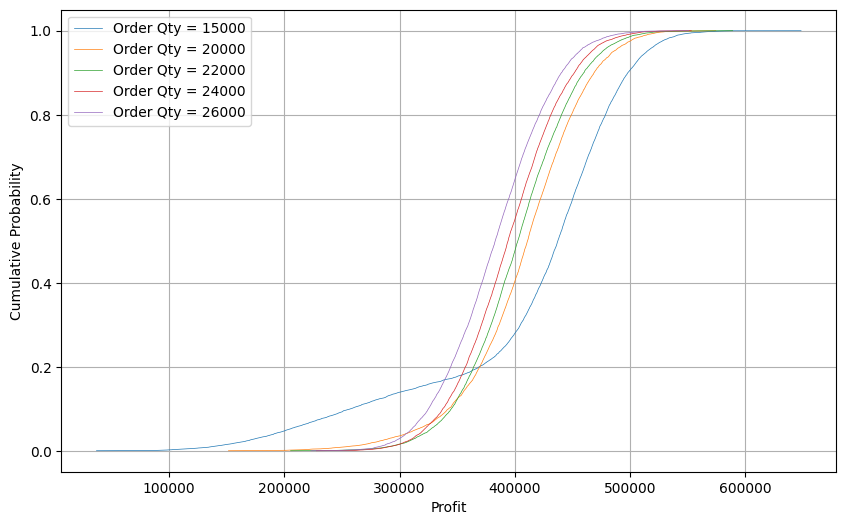

In [21]:
np.random.seed(100)
profits_15000 = simulate_profits(ks_order_quantity=15000, num_trials=10000)
profits_20000 = simulate_profits(ks_order_quantity=20000, num_trials=10000)
profits_22000 = simulate_profits(ks_order_quantity=22000, num_trials=10000)
profits_24000 = simulate_profits(ks_order_quantity=24000, num_trials=10000)
profits_26000 = simulate_profits(ks_order_quantity=26000, num_trials=10000)


sorted_22000, cdf_22000 = compute_ecdf(profits_22000)
sorted_24000, cdf_24000 = compute_ecdf(profits_24000)
sorted_26000, cdf_26000 = compute_ecdf(profits_26000)

plt.figure(figsize=(10, 6))
plt.plot(sorted_15000, cdf_15000, label='Order Qty = 15000', linestyle='-', linewidth=0.5)
plt.plot(sorted_20000, cdf_20000, label='Order Qty = 20000', linestyle='-', linewidth=0.5)
plt.plot(sorted_22000, cdf_22000, label='Order Qty = 22000', linestyle='-', linewidth=0.5)
plt.plot(sorted_24000, cdf_24000, label='Order Qty = 24000', linestyle='-', linewidth=0.5)
plt.plot(sorted_26000, cdf_26000, label='Order Qty = 26000', linestyle='-', linewidth=0.5)


plt.xlabel('Profit')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()
plt.show()


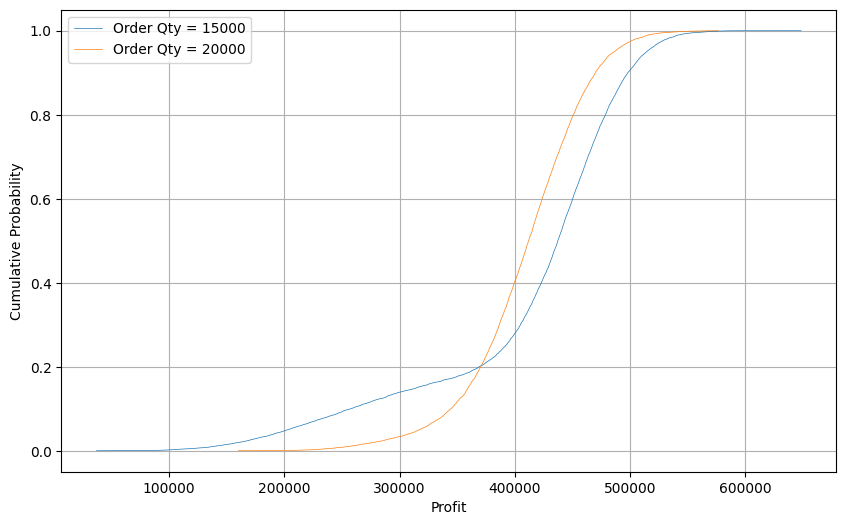

In [22]:
np.random.seed(100)
profits_15000 = simulate_profits(ks_order_quantity=15000, num_trials=10000)
profits_20000 = simulate_profits(ks_order_quantity=20000, num_trials=10000)

sorted_15000, cdf_15000 = compute_ecdf(profits_15000)
sorted_20000, cdf_20000 = compute_ecdf(profits_20000)

plt.figure(figsize=(10, 6))
plt.plot(sorted_15000, cdf_15000, label='Order Qty = 15000', linestyle='-', linewidth=0.5)
plt.plot(sorted_20000, cdf_20000, label='Order Qty = 20000', linestyle='-', linewidth=0.5)

plt.xlabel('Profit')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
#Value Of Information for intiation time when kunshan order is 20000
np.random.seed(100)
simulate_profit2(ks_order_quantity=20000, num_trials= 10000, time_to_assemble = 35 )
simulate_profit2(ks_order_quantity=20000, num_trials= 10000, time_to_assemble = 33 )

Mean Profit: $408228.05
Std_Error of Profit: $520.02
Mean Profit: $408571.84
Std_Error of Profit: $518.34


(408571.8443327798, 518.339590409521)

In [38]:
(408319.21 + 520.33) - (407639.81-520.87)

1720.600000000035